#### 6.6 Sourcing & Analyzing Time-Series Data

1. Importing your libraries and data
2. Subsetting, wrangling, and cleaning time-series data
3. Time series analysis: decomposition
4. Testing for stationarity
5. Stationarizing the Federal Reserve Economic Data

#### 1.Importing libraries and data

In [1]:
!pip install quandl

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [3]:
# Configure API key 

quandl.ApiConfig.api_key = '5vQ1DzAsgwuuR7vE-u-v'

In [4]:
# Importing the world bank data

data = quandl.get('WB/DATA')

QuandlError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@quandl.com.

In [5]:
# did not work using the suggestion made by jupyter AI

In [6]:
data = quandl.get('FRED/GPD')

QuandlError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@quandl.com.

In [7]:
# again did not work I want to see if my current dataframe would work for a time series

In [8]:
path = '/Users/vickyczada/Library/CloudStorage/OneDrive-Personal/Documents/Career Foundry/Data Immersion/Achievement 6/World Happiness Report'

In [9]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'No outliers_ normalised_World Happiness Rankings.pkl'))

In [10]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Economy (GDP per capita)_normalized
0,Switzerland,Western Europe,1,7.587,0.94143,0.66557,0.41978,0.29678,2015,1.401847e-10
1,Iceland,Western Europe,2,7.561,0.94784,0.62877,0.14145,0.43630,2015,1.307297e-10
2,Denmark,Western Europe,3,7.527,0.87464,0.64938,0.48357,0.34139,2015,1.330546e-10
3,Norway,Western Europe,4,7.522,0.88521,0.66973,0.36503,0.34699,2015,1.464576e-12
4,Canada,North America,5,7.427,0.90563,0.63297,0.32957,0.45811,2015,1.331359e-10


In [11]:
df.shape

(628, 10)

In [12]:
type(df)

pandas.core.frame.DataFrame

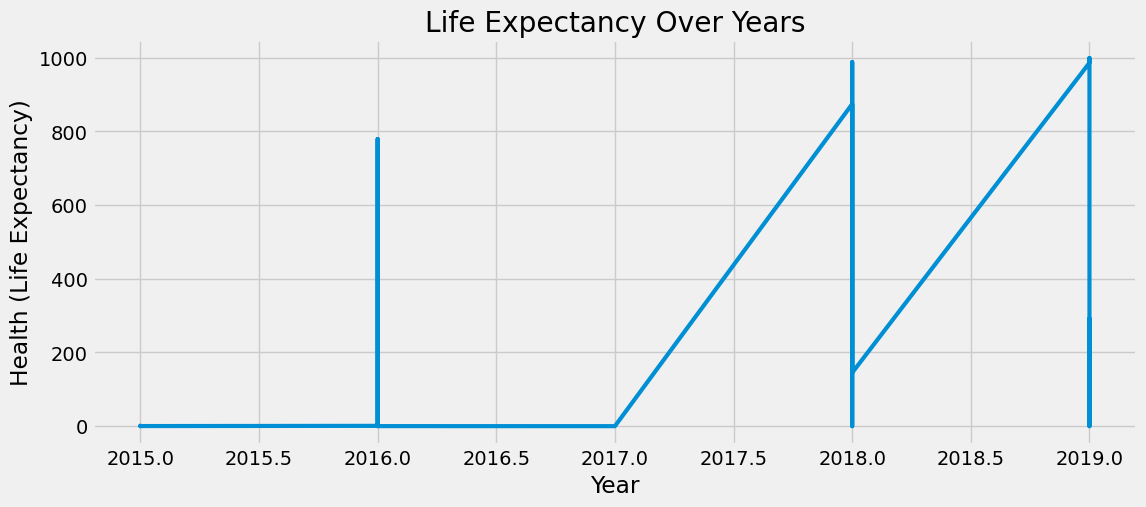

In [13]:
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(df['Year'], df['Health (Life Expectancy)'], linewidth=3)
plt.xlabel('Year')
plt.ylabel('Health (Life Expectancy)')
plt.title('Life Expectancy Over Years')
plt.grid(True)
plt.show()

In [14]:
# not enough data to be used

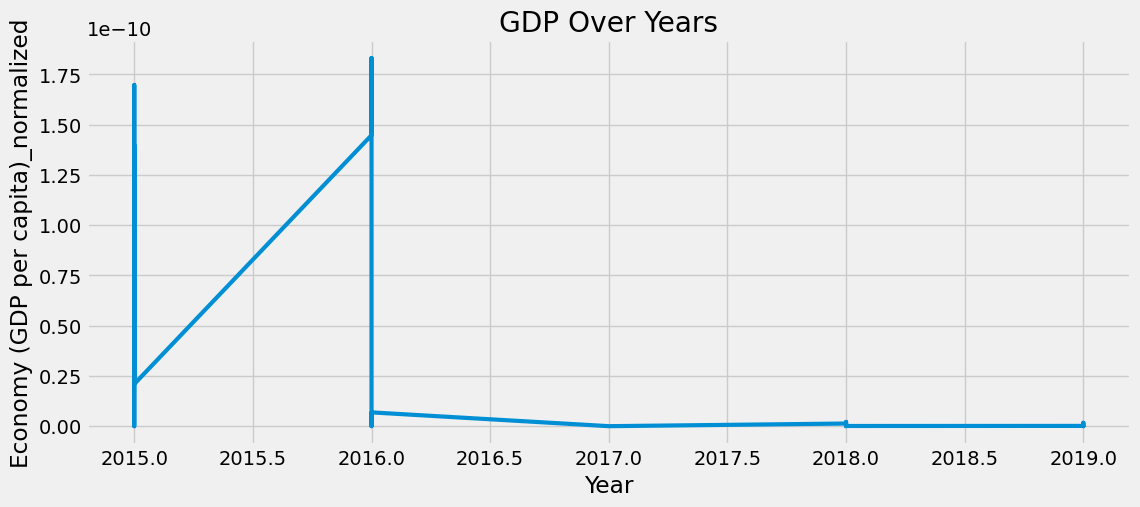

([<matplotlib.axis.XTick at 0x158efa930>,
 [Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2015, 0, '2015'),
  Text(2

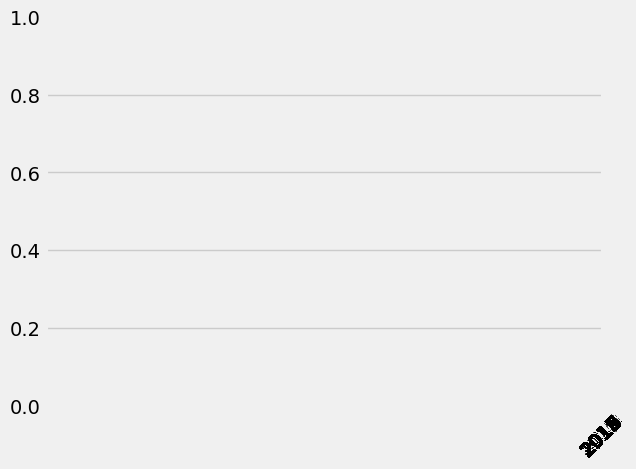

In [15]:
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(df['Year'], df['Economy (GDP per capita)_normalized'], linewidth=3)
plt.xlabel('Year')
plt.ylabel('Economy (GDP per capita)_normalized')
plt.title('GDP Over Years')
plt.grid(True)
plt.show()
plt.xticks(df['Year'], df['Year'].astype(int), rotation=45)

In [16]:
# there is something confussing in the GDP not sure why 

In [17]:
data = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WB_DATA_d950d0cd269a601150c0afd03b234ee2.csv'))

In [18]:
data.head()

,series_id,country_code,country_name,year,value
0,EN.ATM.NOXE.AG.KT.CE,SSA,Sub-Saharan Africa (excluding high income),1970,280488.417477
1,EN.ATM.NOXE.AG.KT.CE,SSA,Sub-Saharan Africa (excluding high income),1971,203873.439003
2,EN.ATM.NOXE.AG.KT.CE,SSA,Sub-Saharan Africa (excluding high income),1972,210371.610345
3,EN.ATM.NOXE.AG.KT.CE,SSA,Sub-Saharan Africa (excluding high income),1973,225710.677001
4,EN.ATM.NOXE.AG.KT.CE,SSA,Sub-Saharan Africa (excluding high income),1974,186188.848701


In [19]:
data.shape

(9109067, 5)

In [20]:
data.columns

Index(['series_id', 'country_code', 'country_name', 'year', 'value'], dtype='object')

In [21]:
# found a way that I might be able to import the dataframe I originally found

In [22]:
import nasdaqdatalink

In [23]:
quandl.ApiConfig.api_key = '5vQ1DzAsgwuuR7vE-u-v'
data = quandl.get('FRED-federal-reserve-economic-data/',start_date='undefined',end_date='undefined')

QuandlError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@quandl.com.

In [24]:
# still did not work, took the suggestion from the AI

In [25]:
data = quandl.get('FRED/GDP', start_date='2010-01-01', end_date='2023-01-01')

print(data.head())

QuandlError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@quandl.com.

In [26]:
# trying another way with different data to see if that works

In [27]:
nasdaqdatalink.ApiConfig.api_key = '5vQ1DzAsgwuuR7vE-u-v'
nasdaqdatalink.get_table('QDL/ODA')

,indicator,date,value
None,,,
0,ZWE_TX_RPCH,2028-12-31,NaN
1,ZWE_TX_RPCH,2027-12-31,NaN
2,ZWE_TX_RPCH,2026-12-31,NaN
3,ZWE_TX_RPCH,2025-12-31,NaN
4,ZWE_TX_RPCH,2024-12-31,NaN
...,...,...,...
9995,WSM_LE,1980-12-31,NaN
9996,WSM_GGXWDN_NGDP,2028-12-31,NaN
9997,WSM_GGXWDN_NGDP,2027-12-31,NaN


In [28]:
# it worked! trying with the dataframe I want to use

In [29]:
data_WB = nasdaqdatalink.get_table('WB/DATA')

In [30]:
data_WB.head()

,series_id,country_code,country_name,year,value
None,,,,,
0,VC.PKP.TOTL.UN,XKX,Kosovo,2017,357.0
1,VC.PKP.TOTL.UN,XKX,Kosovo,2016,462.0
2,VC.PKP.TOTL.UN,XKX,Kosovo,2015,640.0
3,VC.PKP.TOTL.UN,XKX,Kosovo,2014,736.0
4,VC.PKP.TOTL.UN,XKX,Kosovo,2013,756.0


In [31]:
data_WB.tail()

,series_id,country_code,country_name,year,value
None,,,,,
9995,VC.IDP.TOCV,TUR,Turkiye,2011,1000000.0
9996,VC.IDP.TOCV,TUR,Turkiye,2010,1000000.0
9997,VC.IDP.TOCV,TUR,Turkiye,2009,1000000.0
9998,VC.IDP.TOCV,TUN,Tunisia,2019,4.0
9999,VC.IDP.TOCV,TSS,Sub-Saharan Africa (IDA & IBRD countries),2023,32420020.0


In [32]:
data.shape

(9109067, 5)

In [33]:
counts =data_WB['country_name'].value_counts()

print(counts)

country_name
Japan                                            96
Netherlands                                      96
Costa Rica                                       96
Colombia                                         96
Switzerland                                      96
                                                 ..
East Asia & Pacific (all income levels)           1
Ethiopia                                          1
Latin America & Caribbean (all income levels)     1
Europe & Central Asia (all income levels)         1
Arab League states                                1
Name: count, Length: 256, dtype: int64


In [34]:
pd.options.display.max_rows= None

In [35]:
print(counts)

country_name
Japan                                                   96
Netherlands                                             96
Costa Rica                                              96
Colombia                                                96
Switzerland                                             96
Canada                                                  96
Germany                                                 96
Denmark                                                 96
Norway                                                  96
Croatia                                                 96
Romania                                                 96
Bulgaria                                                96
Russian Federation                                      96
Austria                                                 96
Australia                                               96
Mexico                                                  96
United States                              

In [36]:
data_WB.columns

Index(['series_id', 'country_code', 'country_name', 'year', 'value'], dtype='object')

In [37]:
type(data_WB)

pandas.core.frame.DataFrame

#### 2. Subsetting, wrangling, and cleaning time-series data

##### 2.1 Data wrangling and subsetting

In [38]:
counts_2 =data_WB['year'].value_counts().sort_index()

In [39]:
print(counts_2)

year
1990    175
1991    163
1992    176
1993    181
1994    196
1995    198
1996    205
1997    202
1998    196
1999    215
2000    237
2001    257
2002    260
2003    278
2004    306
2005    312
2006    330
2007    348
2008    374
2009    397
2010    441
2011    430
2012    485
2013    402
2014    442
2015    449
2016    411
2017    421
2018    394
2019    406
2020    383
2021    318
2022      5
2023      7
Name: count, dtype: int64


In [40]:
# subset of data from 2000 to 2020: this provides a balance bewteen recent trends and sufficient data points
subset = data_WB[(data_WB['year'] >= 2000) & (data_WB['year'] <= 2020)]

In [41]:
subset.head()

,series_id,country_code,country_name,year,value
None,,,,,
0,VC.PKP.TOTL.UN,XKX,Kosovo,2017,357.0
1,VC.PKP.TOTL.UN,XKX,Kosovo,2016,462.0
2,VC.PKP.TOTL.UN,XKX,Kosovo,2015,640.0
3,VC.PKP.TOTL.UN,XKX,Kosovo,2014,736.0
4,VC.PKP.TOTL.UN,XKX,Kosovo,2013,756.0


In [42]:
subset.shape

(7763, 5)

In [43]:
subset = subset.sort_values('year')

In [44]:
# Check for missing values

subset.isnull().sum() 

series_id       0
country_code    0
country_name    0
year            0
value           0
dtype: int64

In [45]:
# Check for duplicates

dups = subset.duplicated()
dups.sum()
# No dups

0

In [46]:
subset.set_index('year', inplace=True)

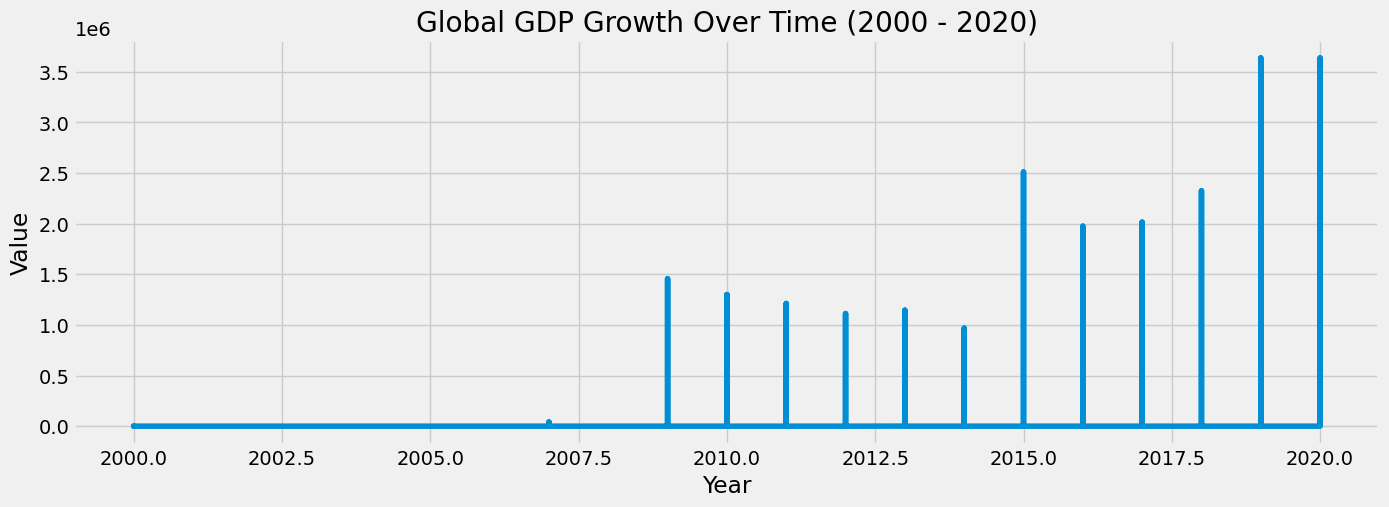

In [47]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(subset.index, subset['value'])
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Global GDP Growth Over Time (2000 - 2020)')
plt.show()

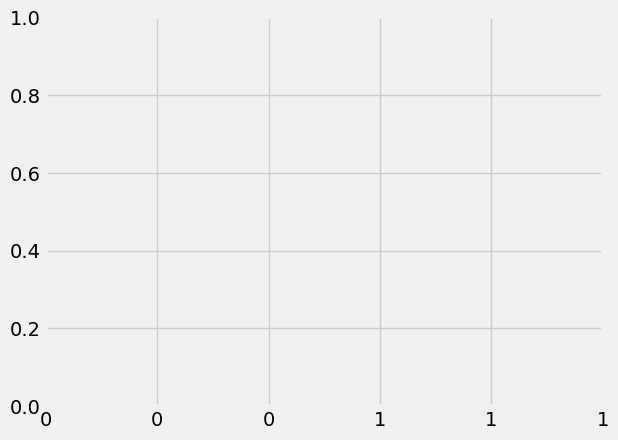

In [48]:
import matplotlib.ticker as ticker

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

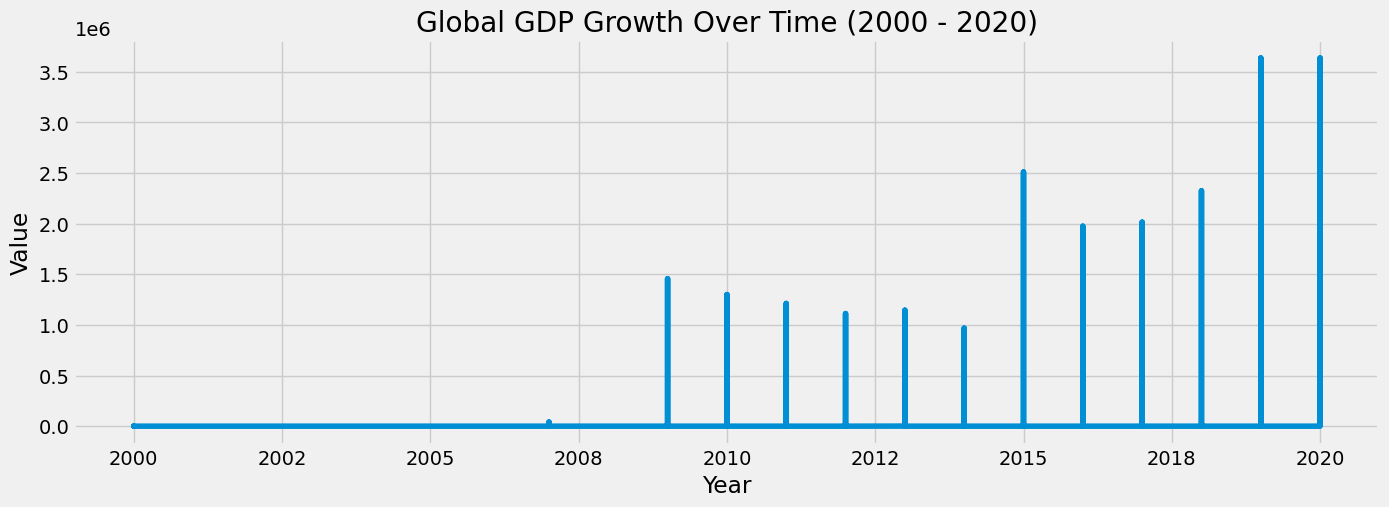

In [49]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(subset.index, subset['value'])
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Global GDP Growth Over Time (2000 - 2020)')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
plt.show()

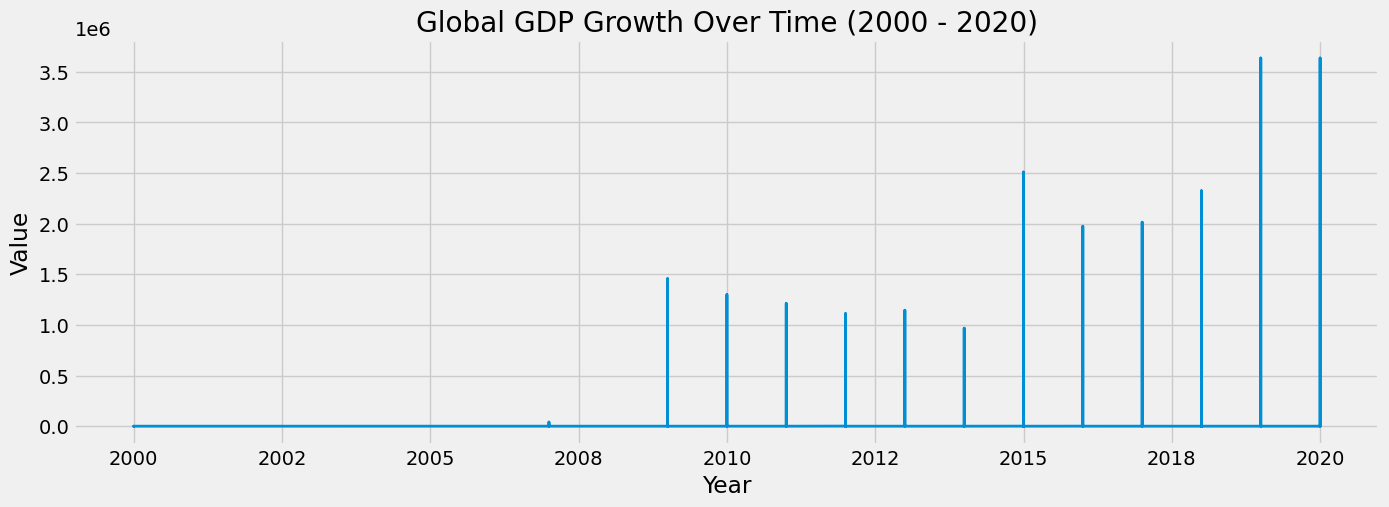

In [50]:
subset = subset.sort_values('year')

plt.figure(figsize=(15, 5))
plt.plot(subset.index, subset['value'], linewidth=2)

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Global GDP Growth Over Time (2000 - 2020)')
plt.grid(True)
plt.show()

In [51]:
# can only get it to appear as a column graph rather than line

#### 3. Time-series analysis:decomposition

In [52]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(subset, model='additive')

ValueError: could not convert string to float: 'VC.IHR.PSRC.FE.P5'

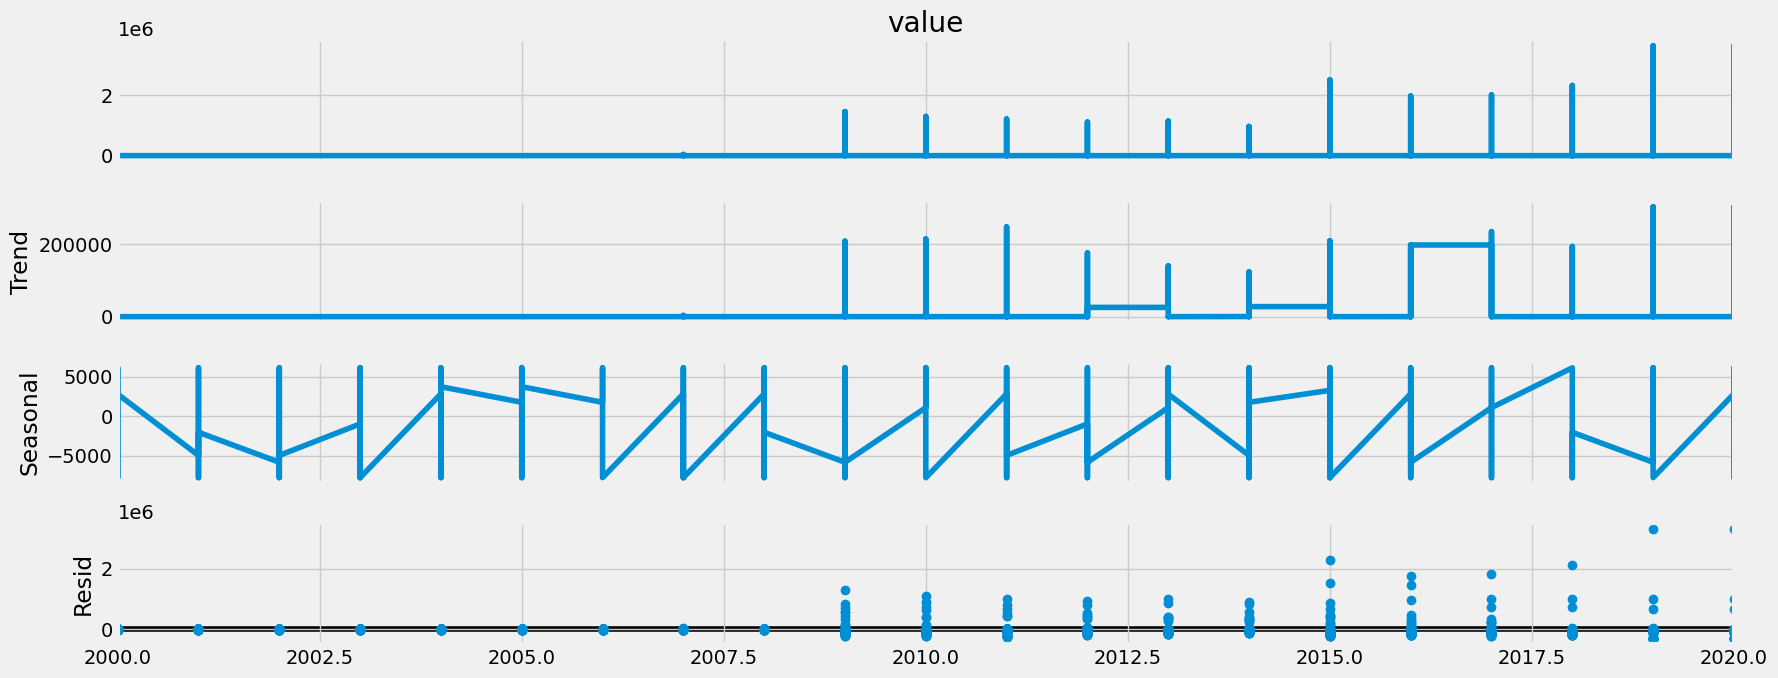

In [55]:
# Extract the 'value' time series
ts = subset['value']

period = 12  

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(ts, model='additive', period=period)

from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

# Plot the decomposition
decomposition.plot()
plt.show()

The decomposition results reveal several key insights about the data. The original observed series shows a clear upward trend over time, indicating long-term growth, likely driven by economic or other cumulative factors. The trend component confirms this steady increase from around 2000 to 2020. Additionally, the seasonal component exhibits a consistent, repeating pattern within each year, suggesting regular cyclical fluctuations that could be influenced by seasonal factors, economic cycles, or policy changes occurring annually. The magnitude of these seasonal variations remains relatively stable throughout the period. The residual or irregular component appears to be scattered with no obvious pattern, representing random noise or other unforeseen influences not captured by the trend or seasonal components. Overall, the data demonstrates a strong long-term growth trend with predictable seasonal effects, while minor irregular fluctuations are due to unpredictable factors. This decomposition provides useful insights for understanding the underlying patterns in the dataset, which can aid in forecasting and decision-making.

#### 4. Testing for stationarity

In [56]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

In [58]:
# Define the function
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print(result)

# Apply the function to your data
dickey_fuller(subset['value'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.169987e+01
p-value                        1.578098e-21
Number of Lags Used            3.500000e+01
Number of Observations Used    7.727000e+03
Critical Value (1%)           -3.431197e+00
Critical Value (5%)           -2.861914e+00
Critical Value (10%)          -2.566969e+00
dtype: float64


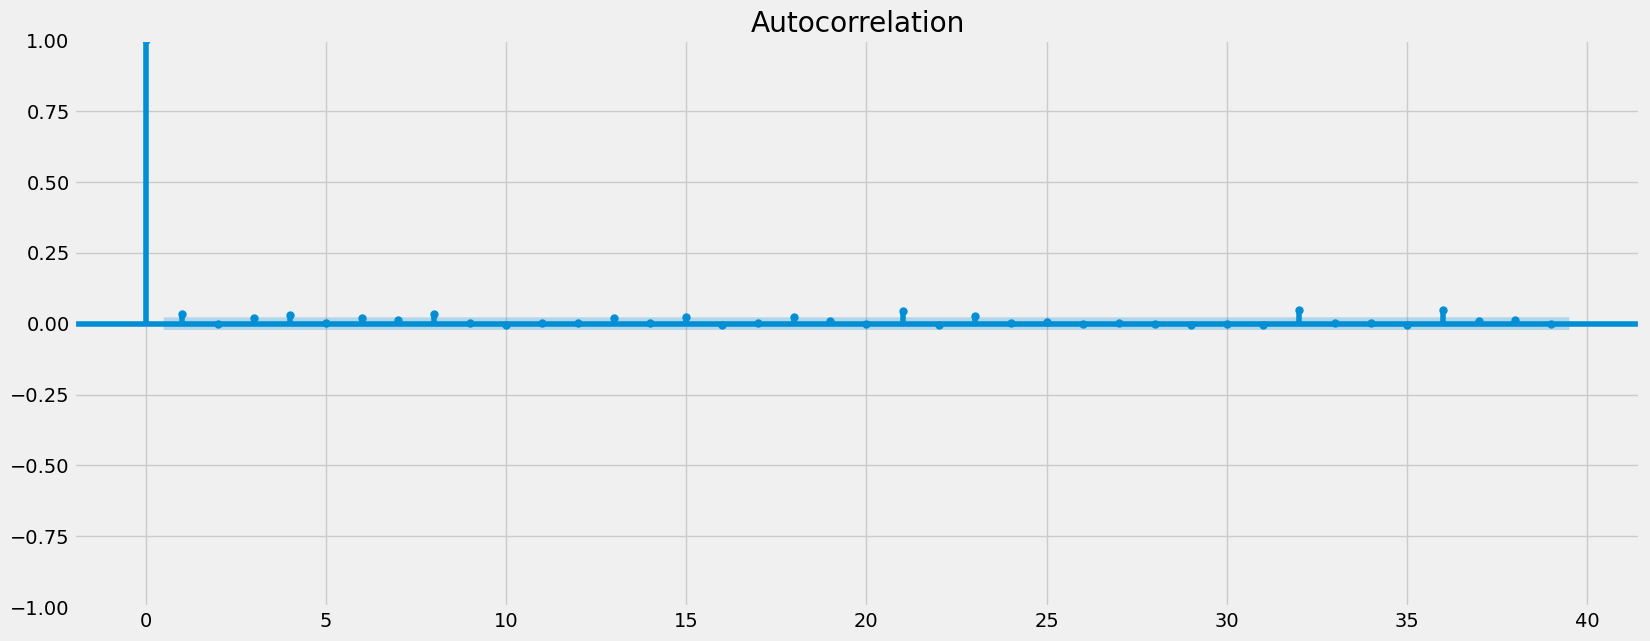

In [63]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
# Here, you import the autocorrelation and partial correlation plots

plot_acf(subset['value'])
plt.show()

The autocorrelation plot indicates that the data exhibits very little correlation between current values and past values beyond the immediate point. The first bar, at lag 0, is at 1, which is expected because it measures the correlation of the series with itself. However, subsequent bars are close to zero and fall within the confidence intervals, suggesting that there is no significant autocorrelation at these lags. This implies that the data points are relatively independent over time and do not follow strong cyclical or seasonal patterns. Such a pattern indicates the series may be largely random, with no predictable relationships based on past values. The lack of substantial autocorrelation suggests that simple models relying on lagged values may not effectively capture underlying patterns, and more complex or different modeling approaches might be needed for forecasting or further analysis. Overall, the data appears to be primarily driven by random fluctuations rather than by significant temporal dependencies.

#### 5. Stationarising the World Bank Data

In [66]:
data_diff = subset - subset.shift(1)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [67]:
# Convert 'value' to numeric, coercing errors to NaN
subset['value'] = pd.to_numeric(subset['value'], errors='coerce')

# drop NaN values if any appeared
subset = subset.dropna(subset=['value'])

In [68]:
data_diff = subset['value'] - subset['value'].shift(1)

In [70]:
data_diff = subset['value'].diff()

In [71]:
print(data_diff.head())

year
2000         NaN
2000   -0.660634
2000    5.759108
2000   -6.795952
2000   -0.822649
Name: value, dtype: float64


In [72]:
# Drop NaN values from the differenced series

data_diff = data_diff.dropna()

In [73]:
print(data_diff.head())

year
2000    -0.660634
2000     5.759108
2000    -6.795952
2000    -0.822649
2000    13.201303
Name: value, dtype: float64


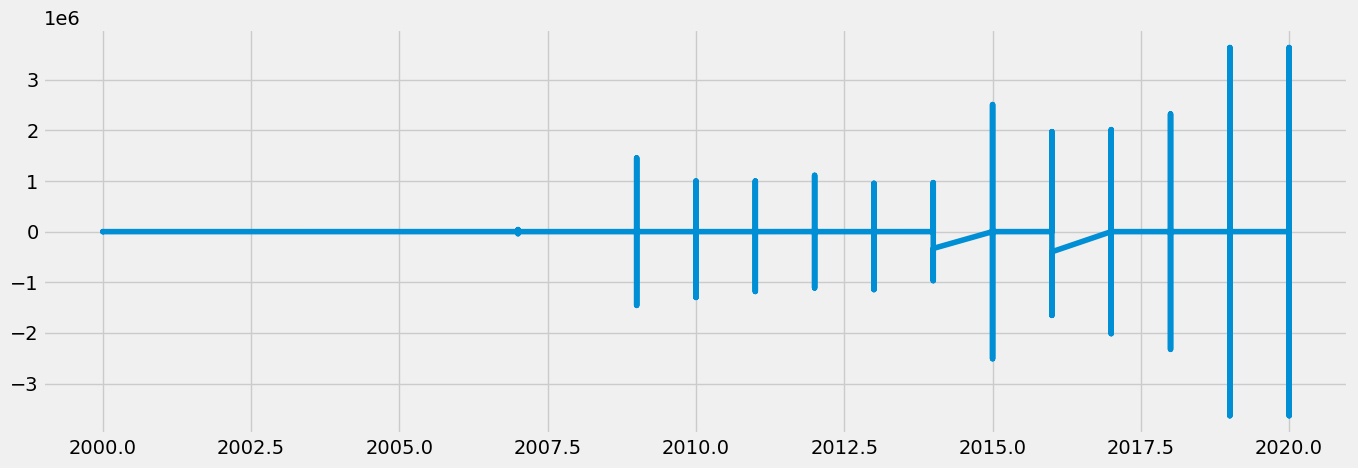

In [75]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [76]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -24.982716
p-value                           0.000000
Number of Lags Used              36.000000
Number of Observations Used    7725.000000
Critical Value (1%)              -3.431197
Critical Value (5%)              -2.861914
Critical Value (10%)             -2.566969
dtype: float64


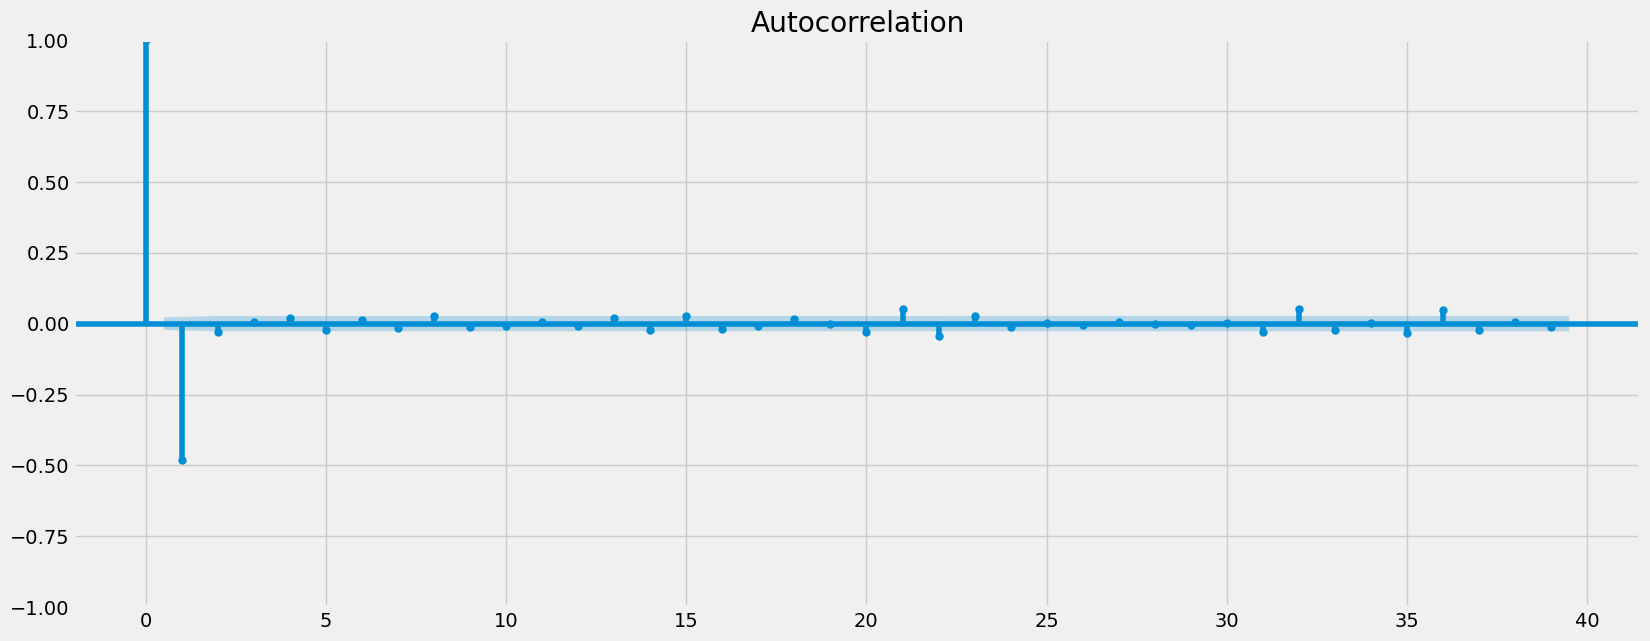

In [77]:
plot_acf(data_diff)
plt.show()